In [15]:
# First time users of Census data, run a pip install

!pip install census

In [16]:
# 08-Ins_Census Solved

# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import json
import os
# Census API Key
from config import api_key

c = Census(api_key, year=2019)

In [17]:
csvpath = os.path.join("Bexar_County_COVID-19_Data_by_Zip_Code.csv")

# read in WeatherPy CSV file
bexar_countydata = pd.read_csv(csvpath)
display(bexar_countydata)

,OBJECTID,ZIP_CODE,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area
0,1,78002,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546
1,2,78006,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416
2,4,78015,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312
3,5,78023,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922
4,7,78052,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147
...,...,...,...,...,...,...,...,...,...,...
71,82,78260,36255,2654,7180.735931,78260,17,45.995671,0.407156,0.005818
72,83,78261,23828,1836,7514.427209,78261,13,53.206729,0.474302,0.006743
73,84,78263,5228,428,8302.618817,78263,1,19.398642,0.680812,0.010405
74,85,78264,13113,1439,10995.644530,78264,13,99.335218,0.726860,0.016811


In [18]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
# See: https://github.com/CommerceDataService/census-wrapper for library documentation
# See: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b for labels
census_race = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E",
                          "B17001_002E","B27002_001E","B02001_001E","B03001_003E","B02001_001E","B02001_002E",
                          "B02001_003E","B02001_004E","B02001_005E","B02001_006E","B02001_007E","B02001_008E",
                          "B02001_009E","B02001_010E"),{'for': 'zip code tabulation area:*'})

In [22]:
# Convert to DataFrame
census_race = pd.DataFrame(census_race)

# Column Reordering
census_race = census_race.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B02001_001E":"Total Race Population",
                                      "B02001_002E":"White",
                                      "B02001_003E":"Black or African American",
                                      "B02001_004E":"America Native",
                                      "B02001_005E":"Asian",
                                      "B02001_006E":"Native Pacific",
                                      "B02001_007E":"Other",
                                      "B02001_008E":"Two or More",
                                      "B02001_009E":"Two or More Inclusive",
                                      "B02001_010E":"Three or More",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "ZIP_CODE"})
display(census_race)

,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,B27002_001E,Total Race Population,B03001_003E,White,Black or African American,America Native,Asian,Native Pacific,Other,Two or More,Two or More Inclusive,Three or More,state,ZIP_CODE
0,ZCTA5 00601,14361.0,17113.0,41.9,7493.0,10552.0,17059.0,17113.0,17052.0,12616.0,182.0,32.0,2.0,0.0,4045.0,236.0,74.0,162.0,72,00601
1,ZCTA5 00602,16807.0,37751.0,42.9,9694.0,18653.0,37737.0,37751.0,34908.0,32179.0,908.0,46.0,0.0,0.0,1194.0,3424.0,85.0,3339.0,72,00602
2,ZCTA5 00603,16049.0,47081.0,42.1,11259.0,23691.0,45834.0,47081.0,45842.0,37359.0,1514.0,68.0,108.0,11.0,7342.0,679.0,240.0,439.0,72,00603
3,ZCTA5 00606,12119.0,6392.0,44.3,6093.0,4185.0,6392.0,6392.0,6338.0,2910.0,92.0,17.0,0.0,0.0,3299.0,74.0,53.0,21.0,72,00606
4,ZCTA5 00610,19898.0,26686.0,42.7,10572.0,12204.0,26599.0,26686.0,25368.0,22042.0,461.0,0.0,0.0,1.0,2095.0,2087.0,33.0,2054.0,72,00610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,ZCTA5 99923,-666666666.0,14.0,-666666666.0,NaN,0.0,14.0,14.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02,99923
33116,ZCTA5 99925,62917.0,908.0,45.2,30321.0,158.0,908.0,908.0,33.0,461.0,6.0,306.0,6.0,7.0,0.0,122.0,0.0,122.0,02,99925
33117,ZCTA5 99926,56188.0,1654.0,34.7,22267.0,249.0,1654.0,1654.0,97.0,241.0,0.0,1236.0,40.0,0.0,14.0,123.0,0.0,123.0,02,99926
33118,ZCTA5 99927,-666666666.0,0.0,-666666666.0,-666666666.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02,99927


In [32]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
census_race.to_csv(r'2019_Data1.csv')

#census_pd.to_csv("census_data.csv", encoding="utf-8", index=False)

In [8]:
display(census_race)
display(bexar_countydata)
#census_race.dtypes
#bexar_countydata.dtypes
census_race["ZIP_CODE"] = census_race["ZIP_CODE"].astype(str).astype(int)
census_race.dtypes

NameError: name 'census_race' is not defined

In [10]:
#Merging
census_racecsv = pd.read_csv(r'2019_Data1.csv')
merged_data = pd.merge(census_racecsv,bexar_countydata, on="ZIP_CODE",how="right")

In [23]:
display(merged_data)
testlist = ["Total Race Population","White","Black or African American","America Native",
        "Asian","Native Pacific","Other","Two or More","Two or More Inclusive",
        "Three or More"]

,Unnamed: 0,Name,Household Income,Population,Median Age,Per Capita Income,Poverty Count,B27002_001E,Total Race Population,B03001_003E,...,OBJECTID,populationtotals_totpop_cy,Positive,CasesP100000,ZipInt,ActiveCases,ActiveCaseRate,SHAPE_Length,SHAPE_Area,Percent White
0,27034,ZCTA5 78002,52598.0,6833.0,33.2,17578.0,1403.0,6795.0,6833.0,5567.0,...,1,9061,1063,11816.362830,78002,6,66.696309,0.427542,0.009546,0.893458
1,27038,ZCTA5 78006,85813.0,36056.0,42.0,48906.0,1715.0,35681.0,36056.0,8477.0,...,2,5243,278,4851.657941,78006,3,52.356021,0.552725,0.005416,0.906063
2,27047,ZCTA5 78015,123182.0,15811.0,40.1,51264.0,625.0,15811.0,15811.0,3223.0,...,4,12254,664,5167.315175,78015,7,54.474708,0.278955,0.002312,0.881981
3,27053,ZCTA5 78023,122967.0,31357.0,38.6,43032.0,1182.0,31235.0,31357.0,13317.0,...,5,29569,1947,6588.163638,78023,15,50.756268,0.886455,0.017922,0.823197
4,27068,ZCTA5 78052,60880.0,6769.0,41.8,24531.0,898.0,6687.0,6769.0,4286.0,...,7,699,39,5555.555556,78052,3,427.350427,0.260085,0.001147,0.960555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,27185,ZCTA5 78260,115500.0,26301.0,37.6,45260.0,934.0,26233.0,26301.0,8237.0,...,82,36255,2654,7180.735931,78260,17,45.995671,0.407156,0.005818,0.847610
72,27186,ZCTA5 78261,93853.0,16749.0,34.8,42905.0,561.0,16598.0,16749.0,6322.0,...,83,23828,1836,7514.427209,78261,13,53.206729,0.474302,0.006743,0.825004
73,27187,ZCTA5 78263,78897.0,4440.0,41.6,32029.0,387.0,4440.0,4440.0,1567.0,...,84,5228,428,8302.618817,78263,1,19.398642,0.680812,0.010405,0.799324
74,27188,ZCTA5 78264,50729.0,10623.0,31.2,18190.0,2918.0,10623.0,10623.0,8574.0,...,85,13113,1439,10995.644530,78264,13,99.335218,0.726860,0.016811,0.862280


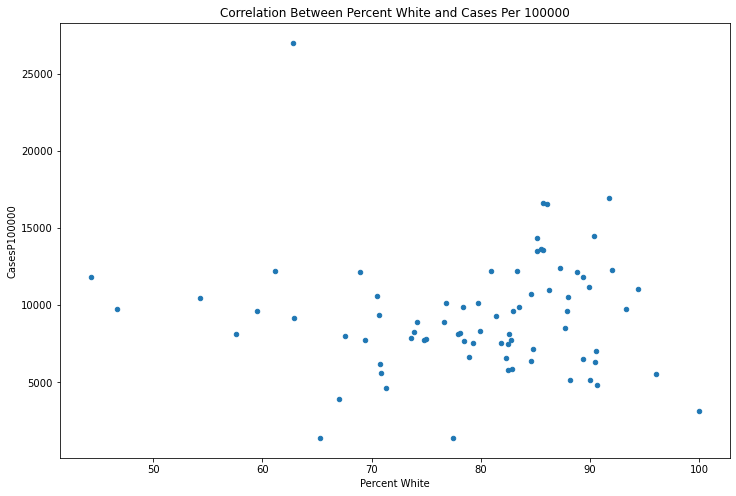

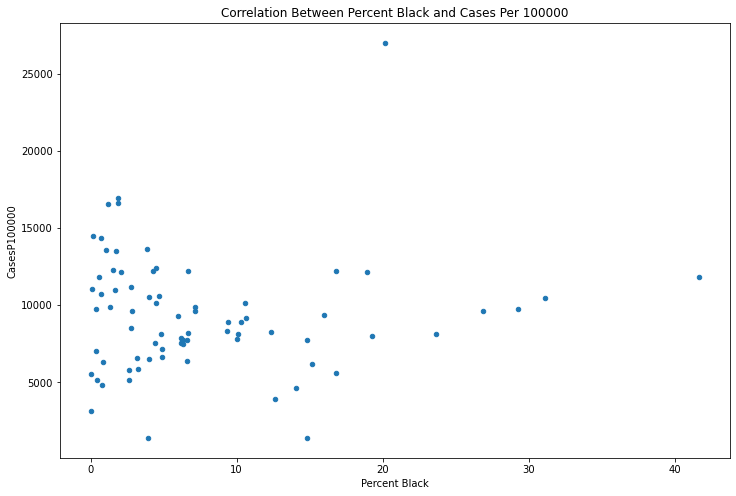

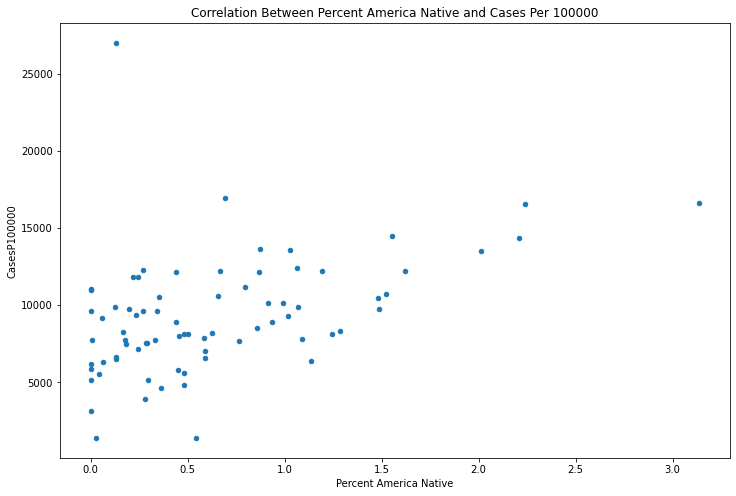

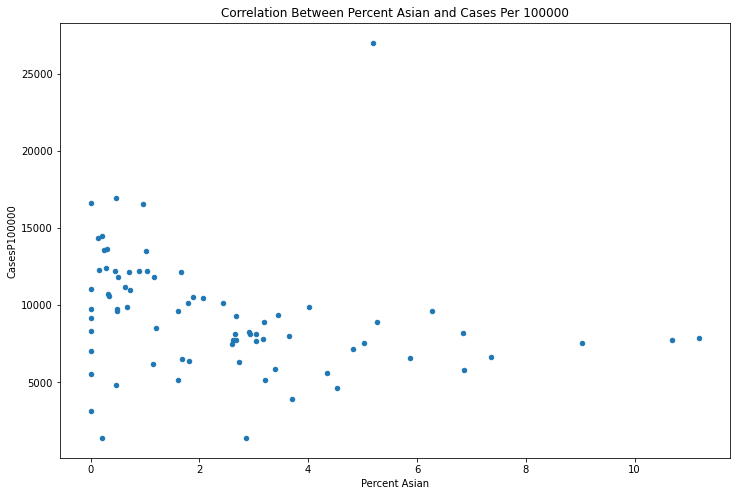

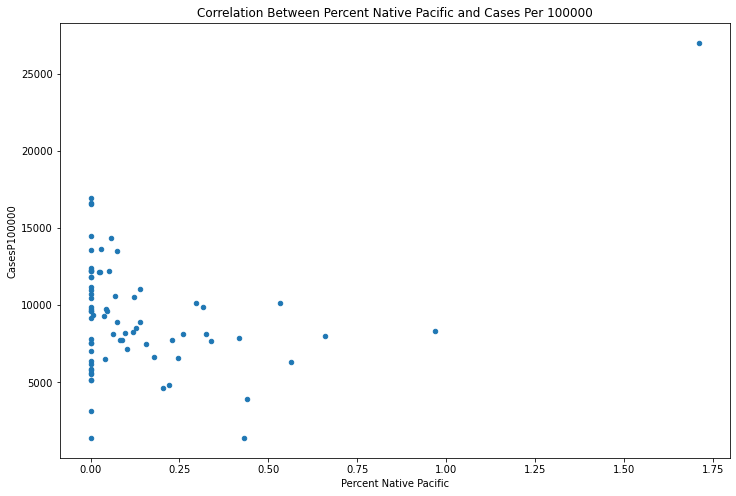

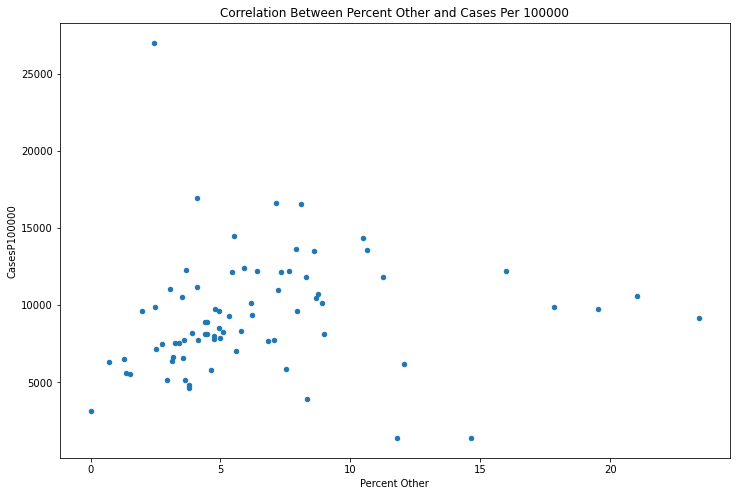

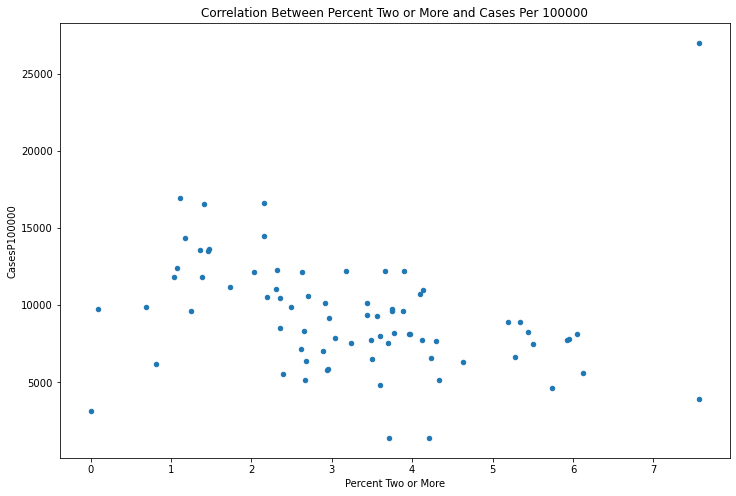

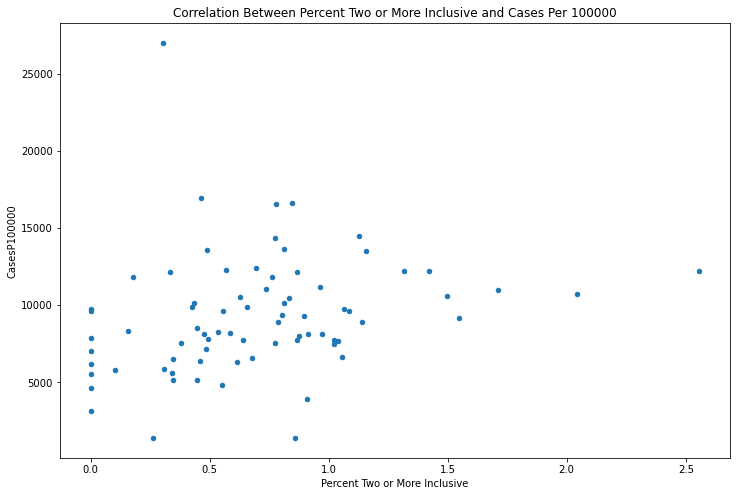

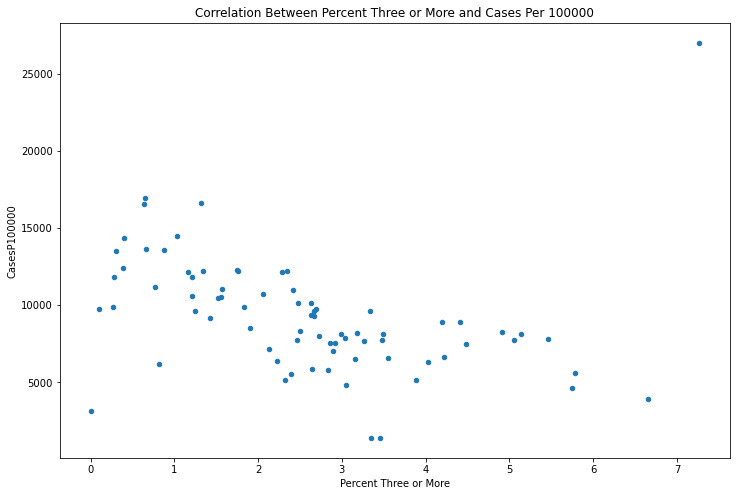

In [38]:
merged_data["Percent White"] = merged_data["White"]/merged_data["Total Race Population"]*100
merged_data["Percent Black"] = merged_data["Black or African American"]/merged_data["Total Race Population"]*100
merged_data["Percent America Native"] = merged_data["America Native"]/merged_data["Total Race Population"]*100
merged_data["Percent Asian"] = merged_data["Asian"]/merged_data["Total Race Population"]*100
merged_data["Percent Native Pacific"] = merged_data["Native Pacific"]/merged_data["Total Race Population"]*100
merged_data["Percent Other"] = merged_data["Other"]/merged_data["Total Race Population"]*100
merged_data["Percent Two or More"] = merged_data["Two or More"]/merged_data["Total Race Population"]*100
merged_data["Percent Two or More Inclusive"] = merged_data["Two or More Inclusive"]/merged_data["Total Race Population"]*100
merged_data["Percent Three or More"] = merged_data["Three or More"]/merged_data["Total Race Population"]*100


percentlist = ["Percent White","Percent Black","Percent America Native",
               "Percent Asian","Percent Native Pacific","Percent Other",
              "Percent Two or More","Percent Two or More Inclusive",
              "Percent Three or More"]

for element in percentlist:
    merged_data.plot.scatter(element,"CasesP100000", figsize = (12,8),
                             title=f'Correlation Between {element} and Cases Per 100000')
    densitycorrelation = st.pearsonr(merged_data['Average Tumor Volume (mm3)'],
                                 merged_data["Weight (g)"])

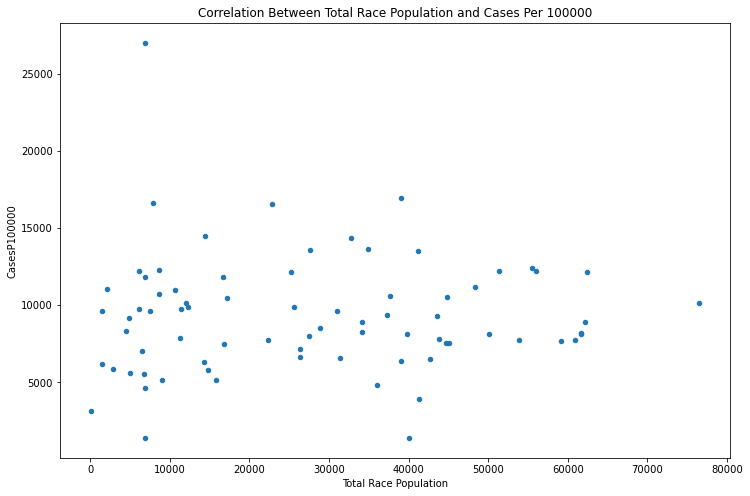

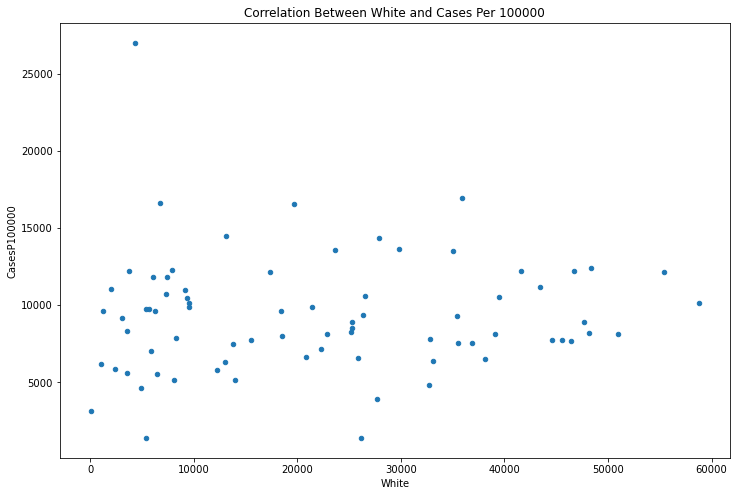

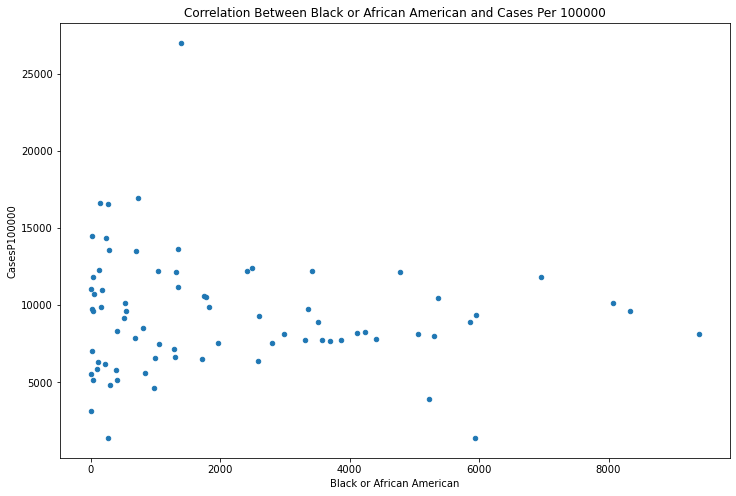

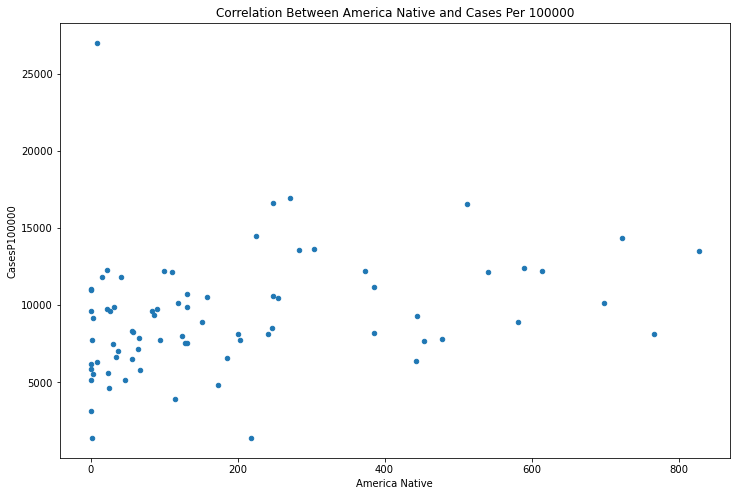

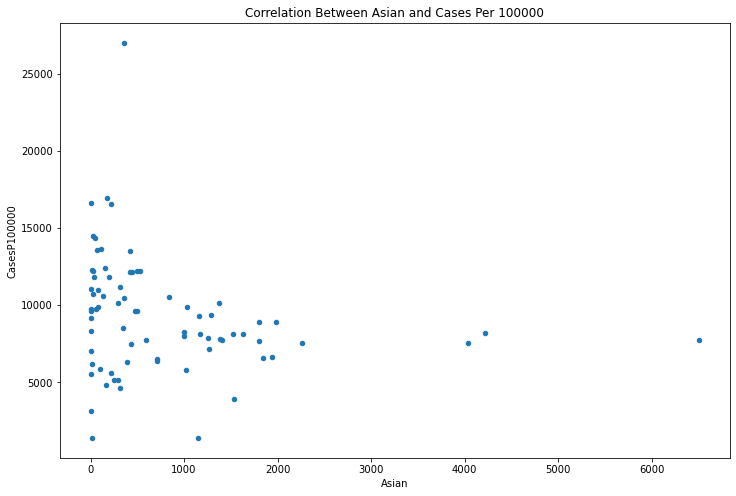

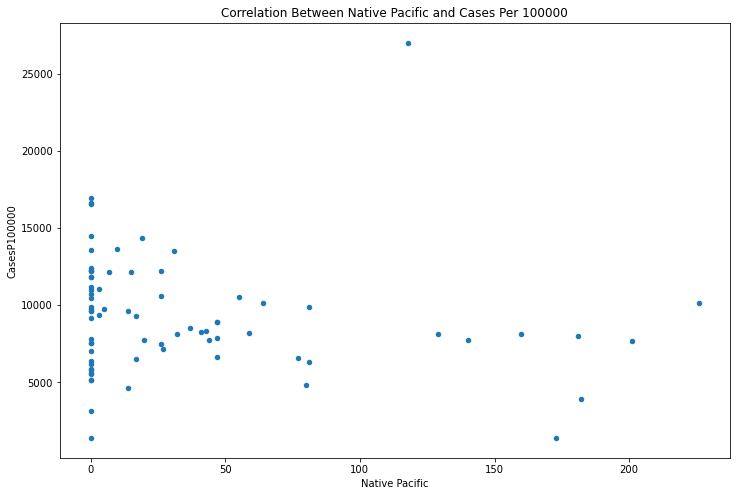

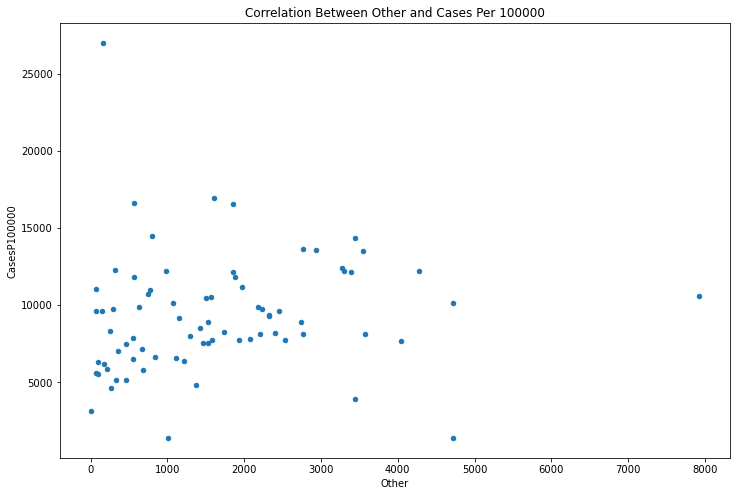

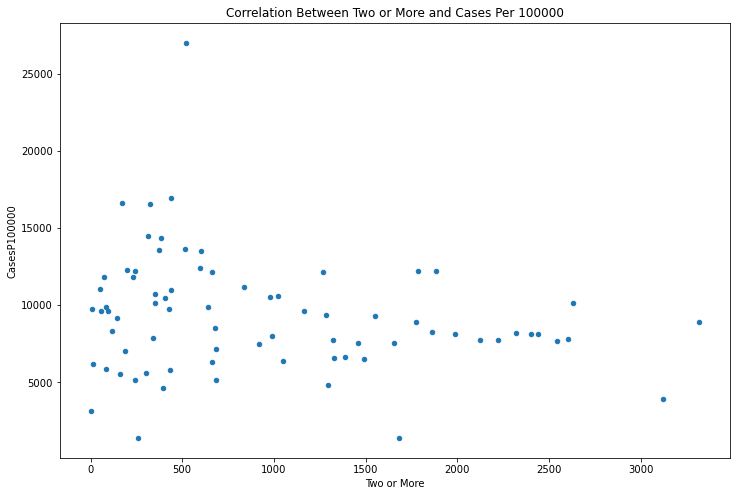

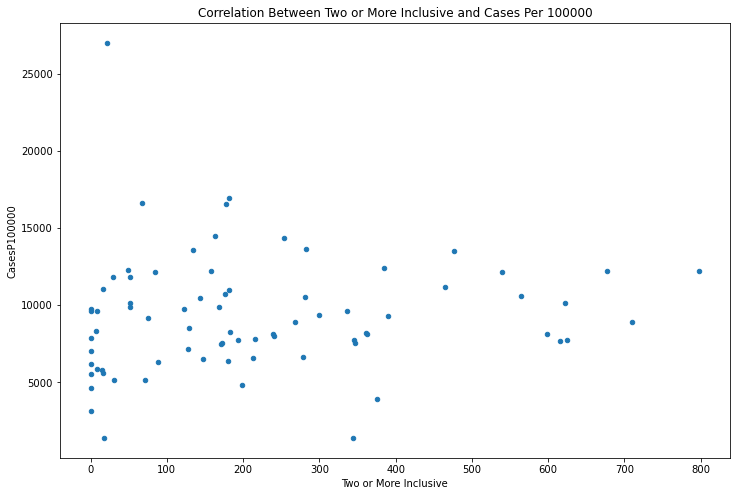

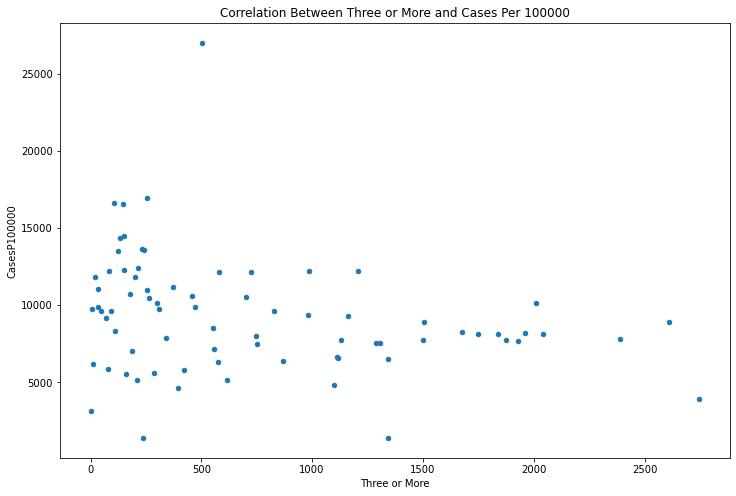

In [26]:

for element in testlist:
    merged_data.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Correlation Between {element} and Cases Per 100000')
    